In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.metrics import classification_report , confusion_matrix
plt.rcParams['figure.figsize'] = (15,10)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , GaussianNB
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

In [2]:
df = pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [3]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
df.drop(index=df[df.duplicated()].index,inplace=True)

In [8]:
df.duplicated().any()

False

In [10]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
x= df.drop('Salary',axis=1)
y=df['Salary']

In [13]:
oe = OrdinalEncoder()
lb = LabelEncoder()
x[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']] = oe.fit_transform(x[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']])
y = lb.fit_transform(y)


# VIZ


<AxesSubplot:xlabel='Salary', ylabel='count'>

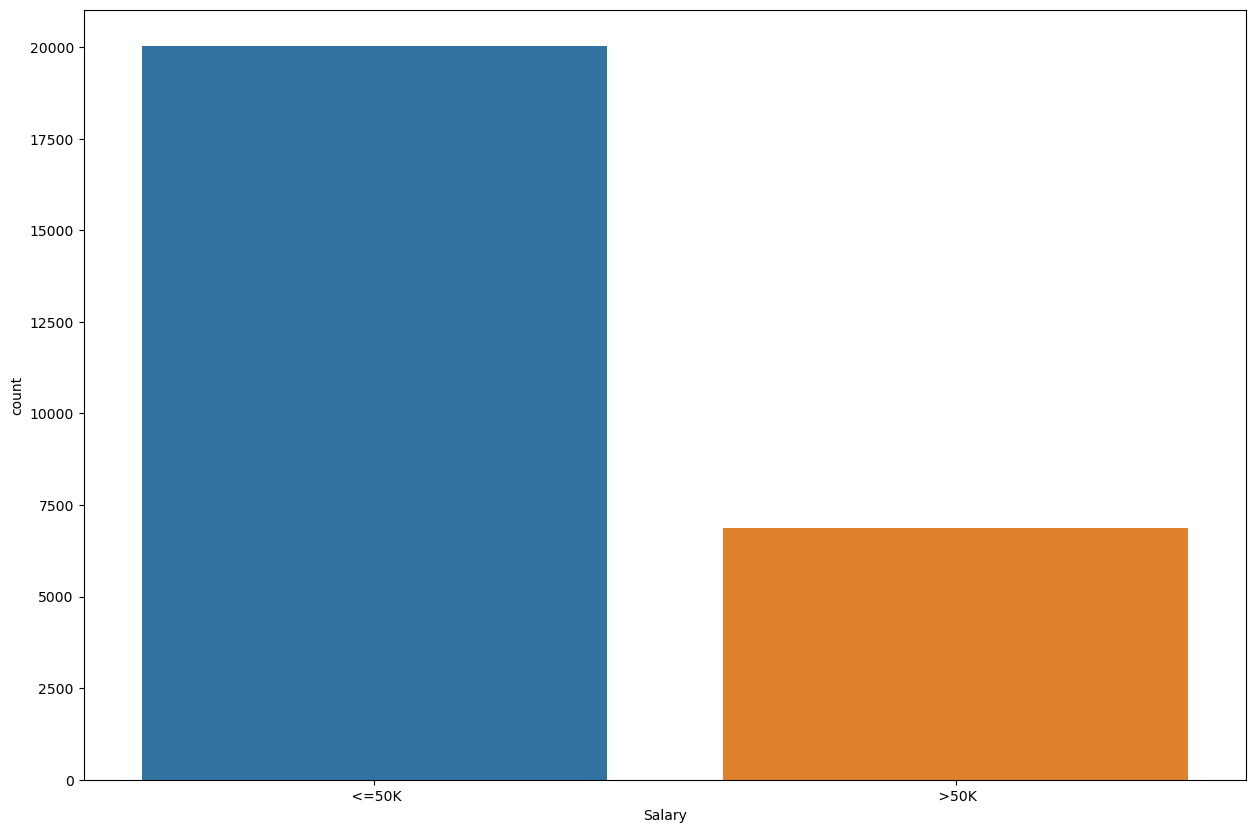

In [17]:

sns.countplot(data=df,x='Salary',)

<AxesSubplot:xlabel='maritalstatus'>

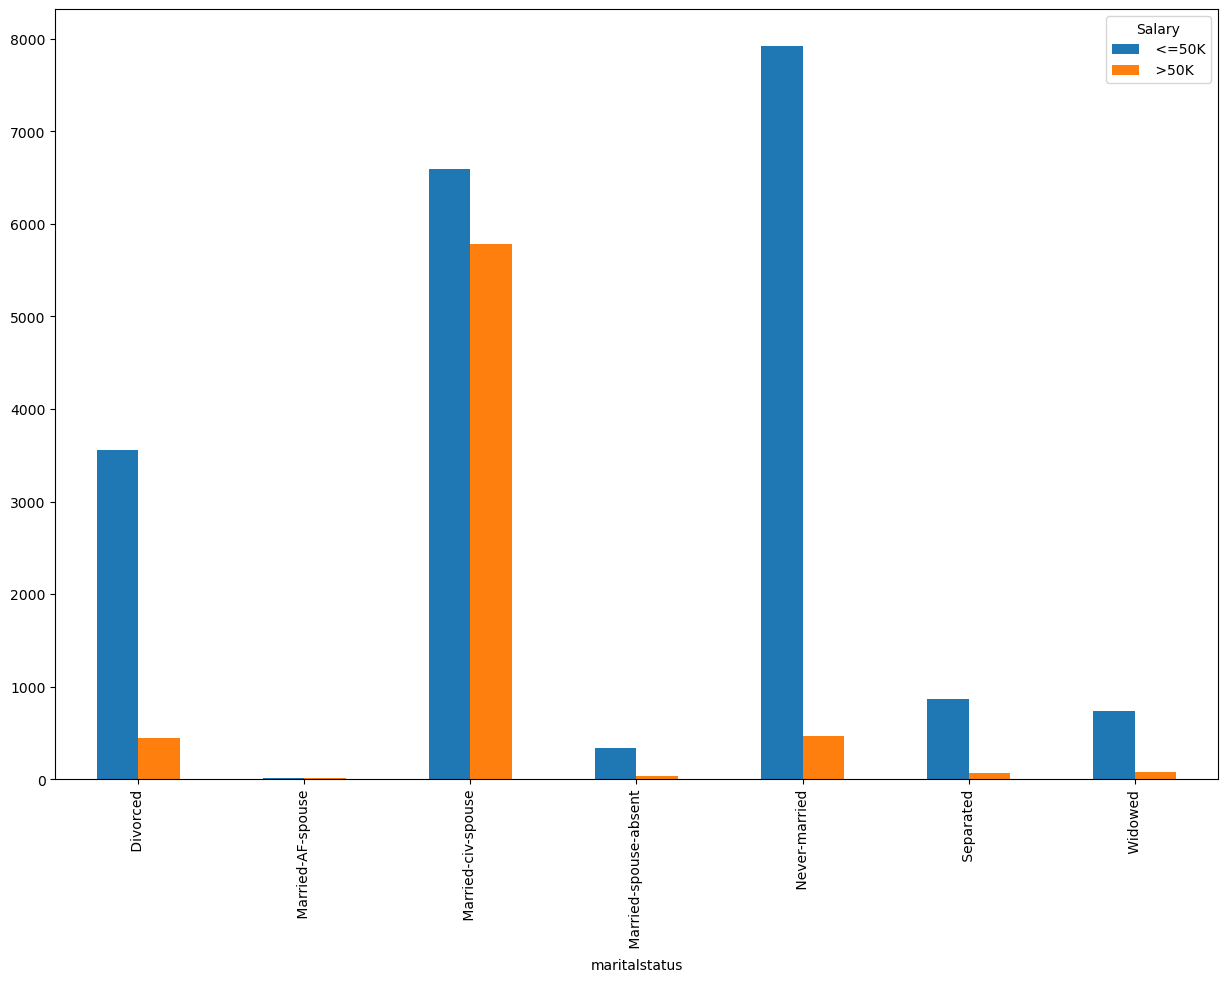

In [18]:
crosstab = pd.crosstab(index =df['maritalstatus'],columns=df['Salary'])
crosstab.plot.bar()

<AxesSubplot:xlabel='workclass'>

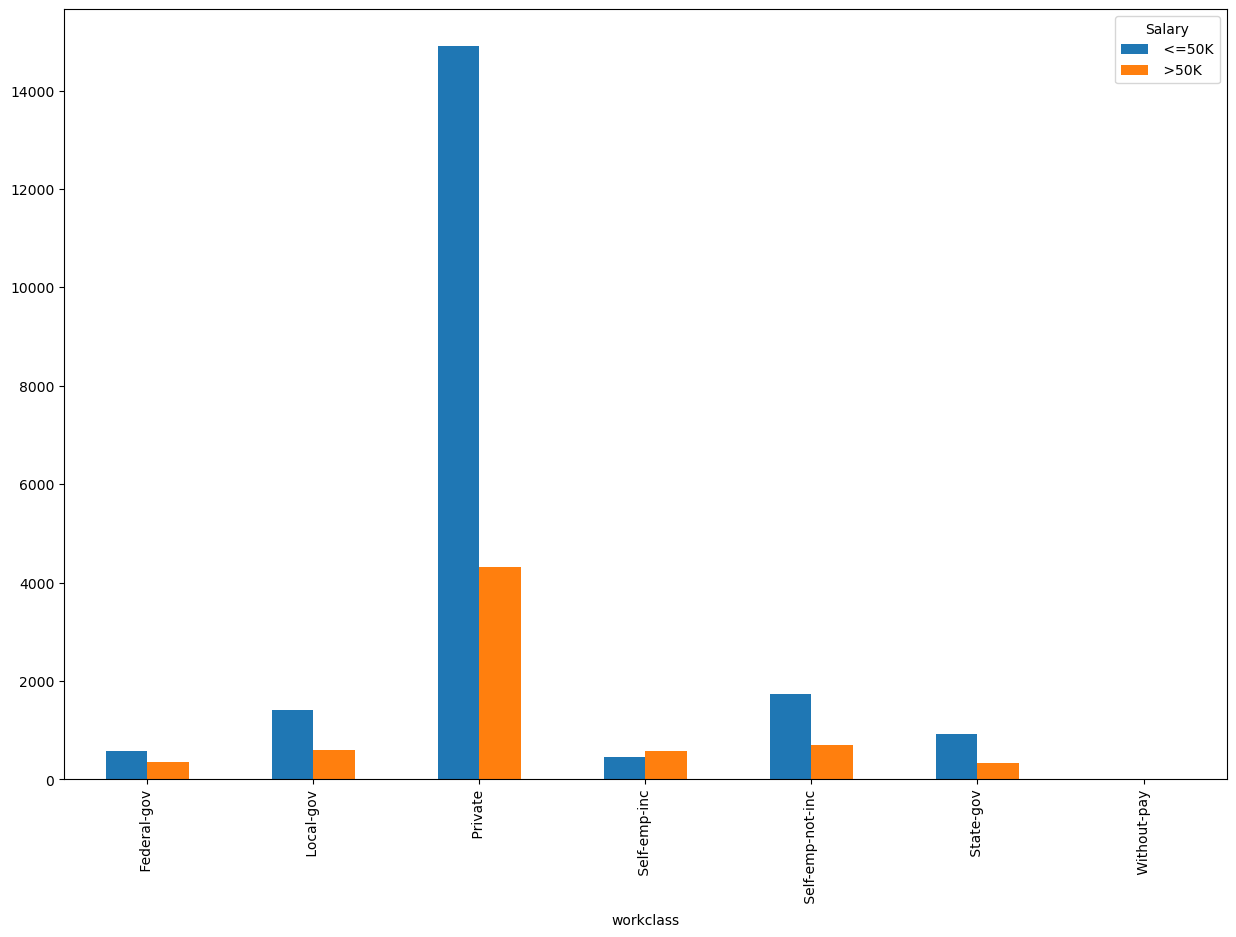

In [19]:
crosstab = pd.crosstab(index =df['workclass'],columns=df['Salary'])
crosstab.plot.bar()

<AxesSubplot:xlabel='occupation'>

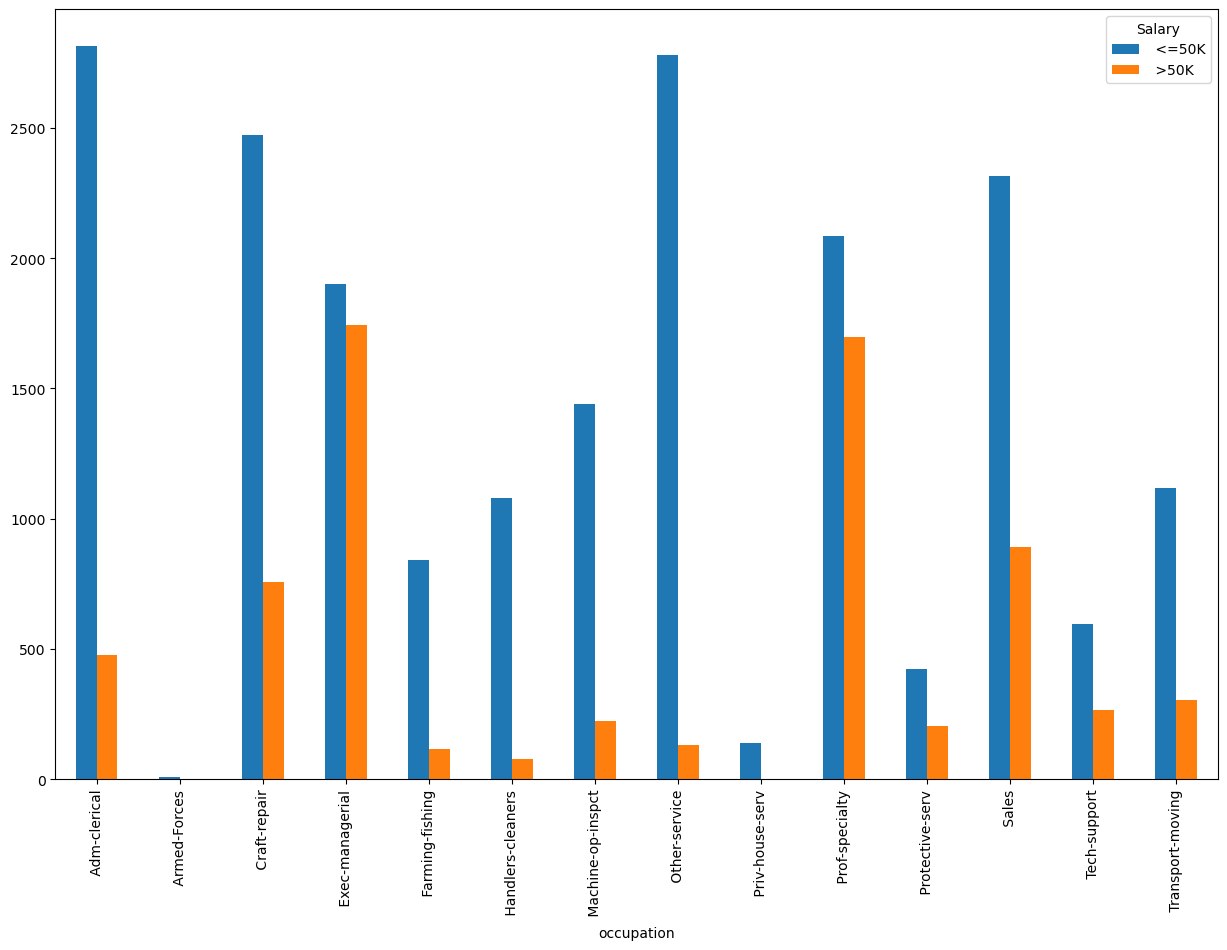

In [20]:
crosstab = pd.crosstab(index =df['occupation'],columns=df['Salary'])
crosstab.plot.bar()

<AxesSubplot:xlabel='race'>

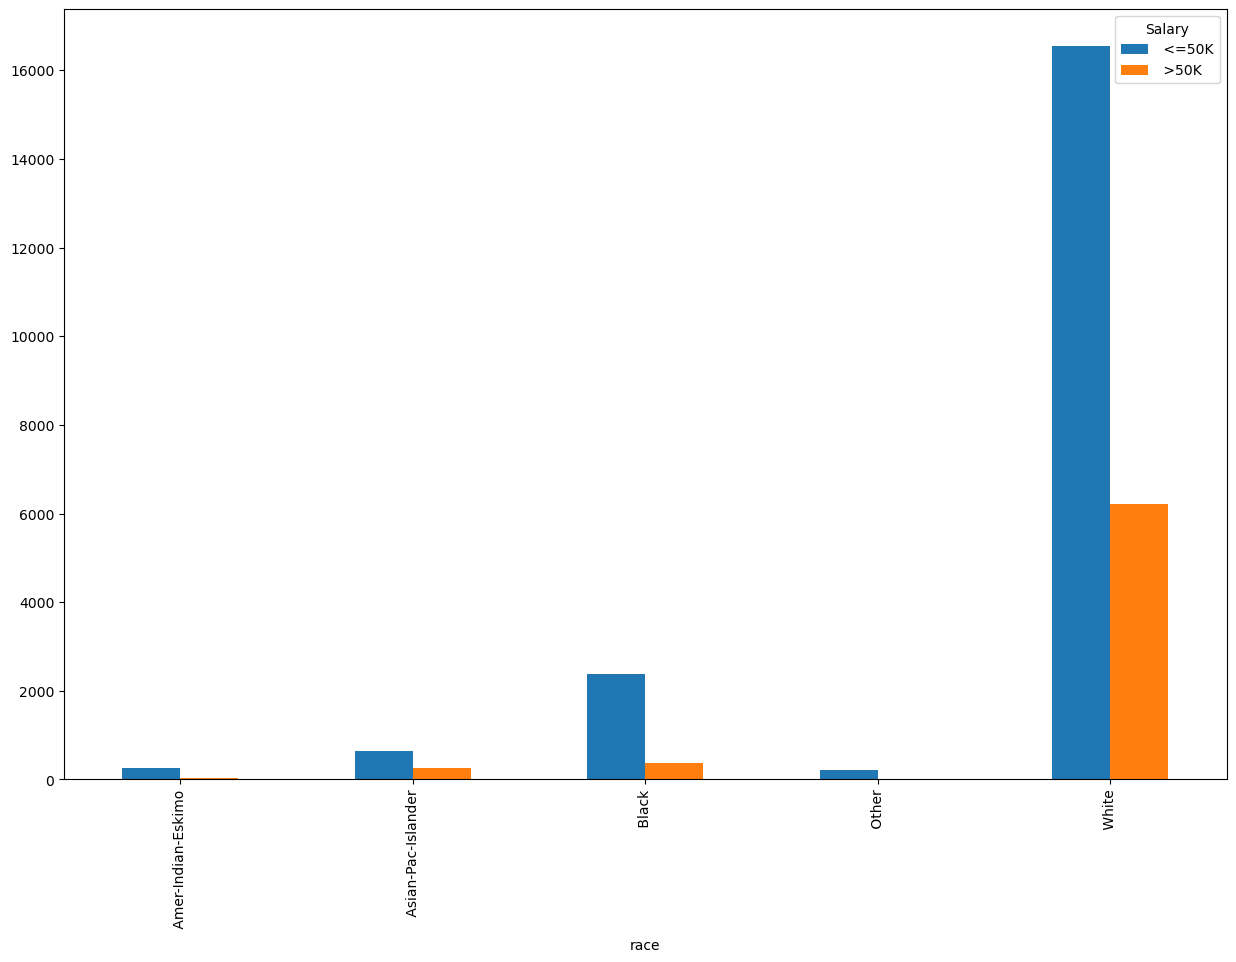

In [21]:
crosstab = pd.crosstab(index =df['race'],columns=df['Salary'])
crosstab.plot.bar()

<AxesSubplot:xlabel='sex'>

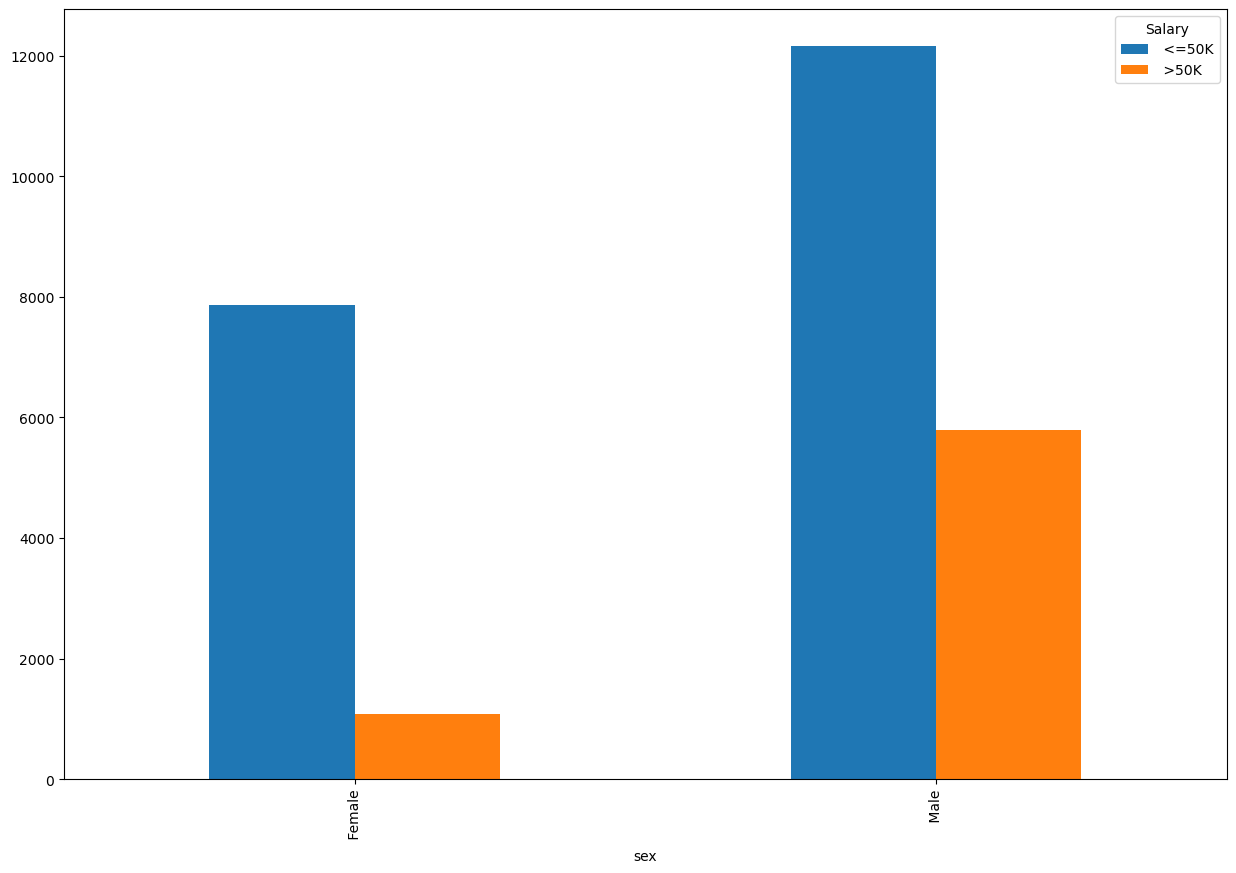

In [22]:
crosstab = pd.crosstab(index =df['sex'],columns=df['Salary'])
crosstab.plot.bar()

<AxesSubplot:xlabel='relationship'>

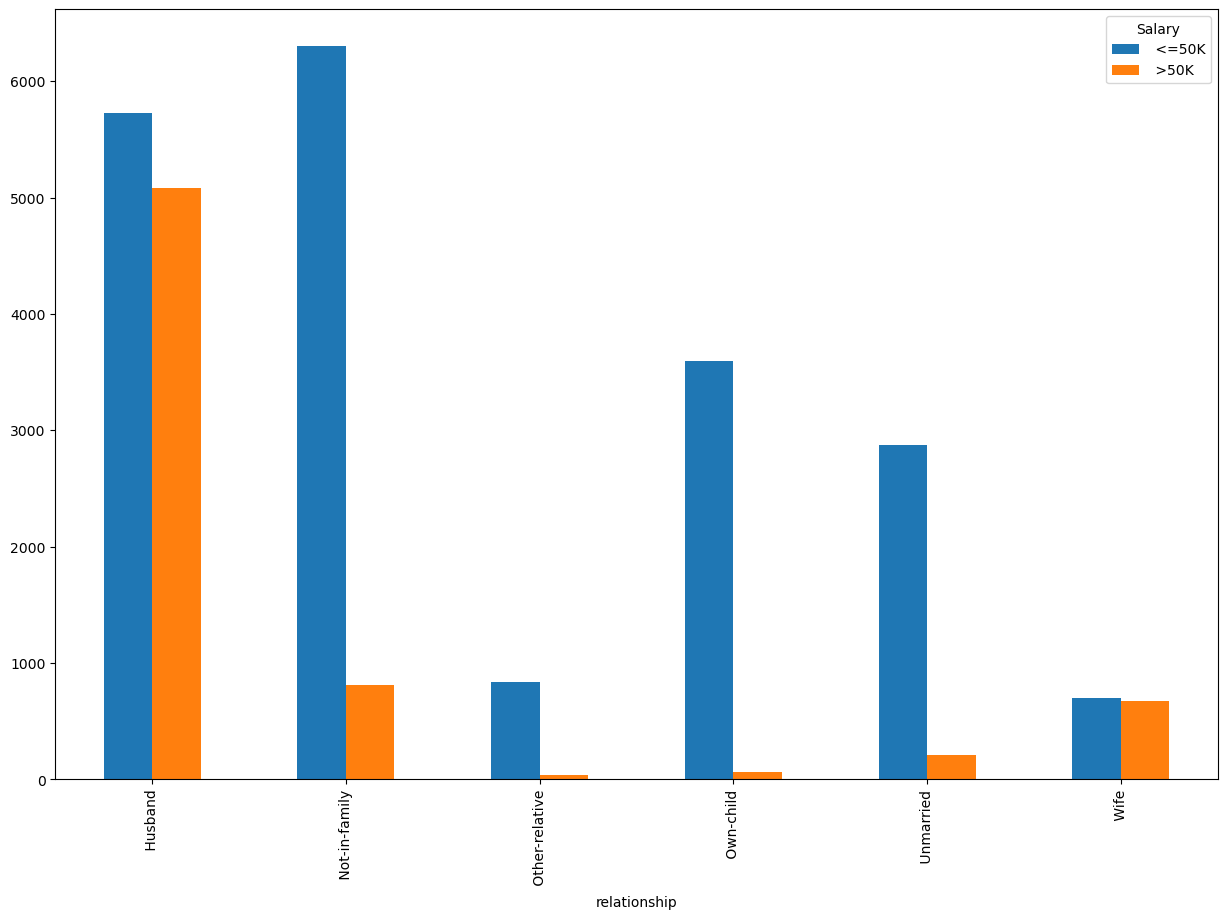

In [23]:
crosstab = pd.crosstab(index =df['relationship'],columns=df['Salary'])
crosstab.plot.bar()

# model

In [24]:
xtrain,xval,ytrain,yval = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)

MultinomialNB()

In [26]:
print(f"Train Accuracy:{round(nb.score(xtrain,ytrain),2)}\nTest Accuracy:{round(nb.score(xval,yval),2)}")

Train Accuracy:0.77
Test Accuracy:0.78


In [27]:
ypred = nb.predict(xval)

In [28]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4032
           1       0.66      0.24      0.35      1349

    accuracy                           0.78      5381
   macro avg       0.72      0.60      0.61      5381
weighted avg       0.76      0.78      0.74      5381



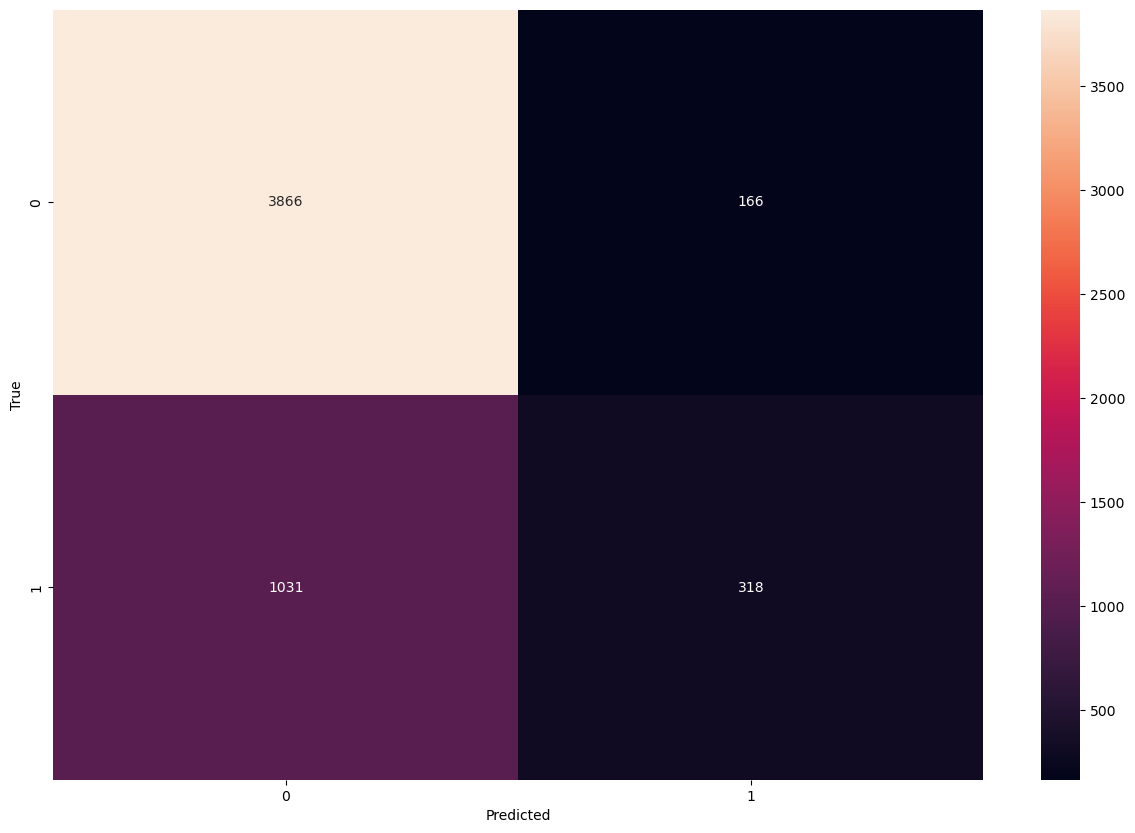

In [29]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [30]:
bb = BernoulliNB()
bb.fit(xtrain,ytrain)

BernoulliNB()

In [31]:
print(f"Train Accuracy:{round(bb.score(xtrain,ytrain),2)}\nTest Accuracy:{round(bb.score(xval,yval),2)}")

Train Accuracy:0.73
Test Accuracy:0.74


In [34]:
ypred = bb.predict(xval)

In [35]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      4032
           1       0.48      0.72      0.58      1349

    accuracy                           0.74      5381
   macro avg       0.68      0.73      0.69      5381
weighted avg       0.79      0.74      0.75      5381



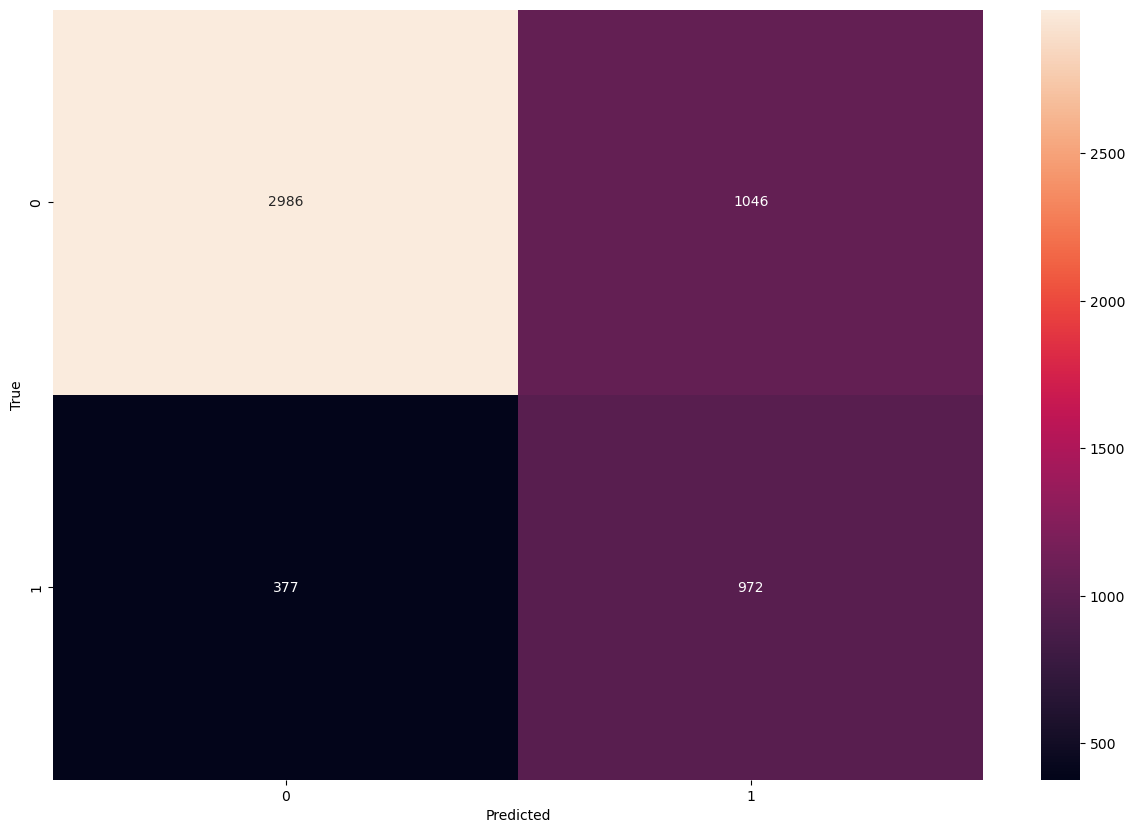

In [36]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [37]:
gb = GaussianNB()
gb.fit(xtrain,ytrain)

GaussianNB()

In [38]:
print(f"Train Accuracy:{round(gb.score(xtrain,ytrain),2)}\nTest Accuracy:{round(gb.score(xval,yval),2)}")

Train Accuracy:0.79
Test Accuracy:0.8


In [39]:
ypred = gb.predict(xval)

In [40]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4032
           1       0.71      0.35      0.47      1349

    accuracy                           0.80      5381
   macro avg       0.76      0.65      0.67      5381
weighted avg       0.79      0.80      0.78      5381



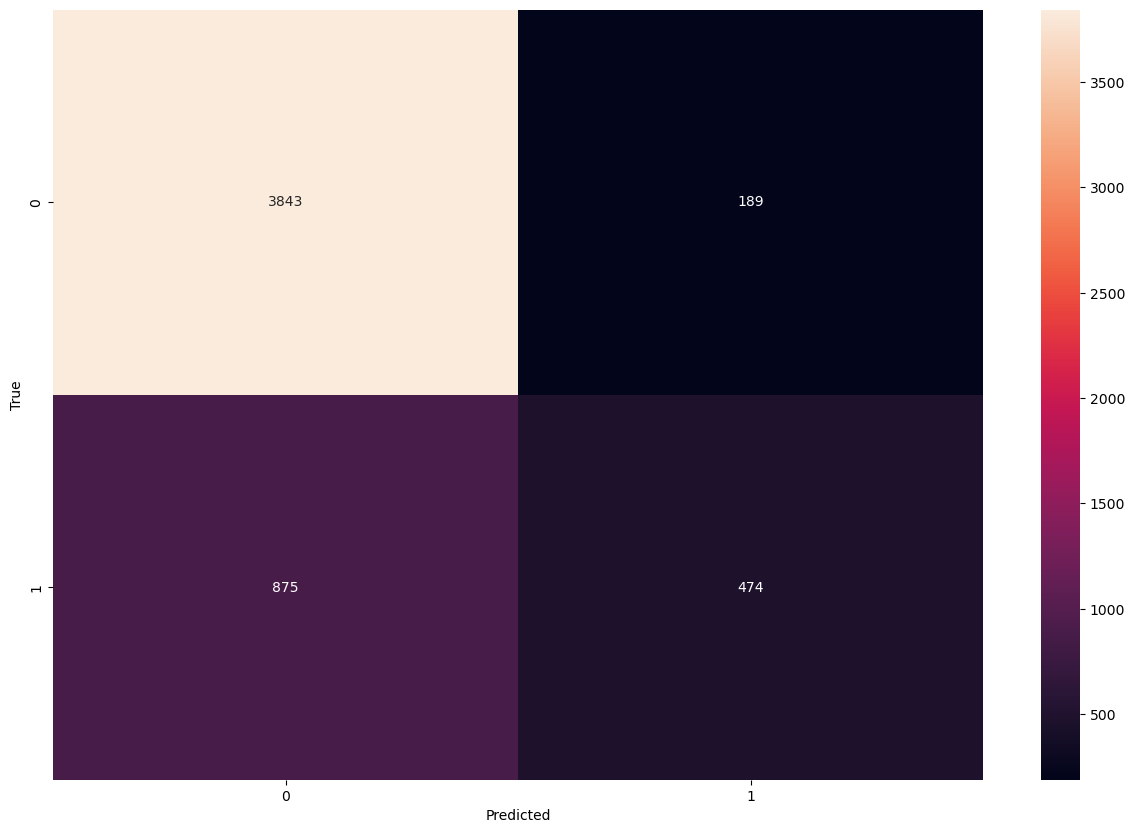

In [41]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# Test prediction

In [42]:
test =pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [43]:
X_test = test.drop('Salary',axis=1)
Y_test = test['Salary']

In [44]:
X_test[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']] = oe.transform(X_test[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']])
Y_test = lb.transform(Y_test)

In [45]:

y_test_pred = nb.predict(X_test)

In [46]:

print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



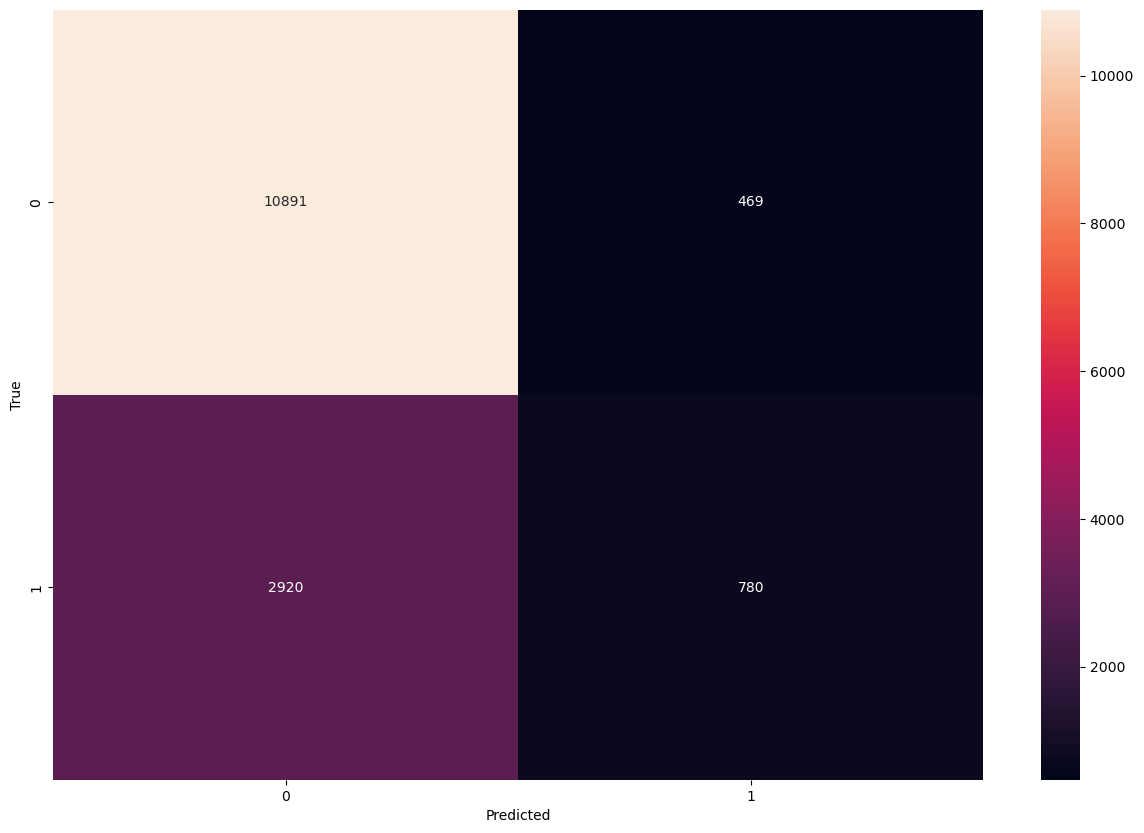

In [47]:
sns.heatmap(confusion_matrix(Y_test,y_test_pred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()